In [ ]:
#Data Preprocessing Steps


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
#Load the Dataset

In [2]:
df = pd.read_csv("F:/Entry/Project/Enrty Final Project.csv")

In [14]:
#Understand the Data Structure

In [15]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,Class,Topic,Question,Data_Value_Unit,DataValueTypeID,Data_Value_Type,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,Age_Group,GeoLocation,ClassID,TopicID,QuestionID,LocationID,StratificationID1
0,2014,2014,US,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,15.0,14.2,15.8,50-54,NaN,C05,TMC01,Q03,59,5054
1,2014,2014,US,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,11.0,10.1,11.8,50-54,NaN,C05,TMC01,Q03,59,5054
2,2014,2014,US,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,10.3,6.6,15.8,50-54,NaN,C05,TMC01,Q03,59,5054
3,2014,2014,US,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,13.2,11.5,15.2,50-54,NaN,C05,TMC01,Q03,59,5054
4,2014,2014,US,"United States, DC & Territories",Mental Health,Frequent mental distress,Percentage of older adults who are experiencin...,%,Prctg,Percentage,12.2,10.5,14.2,50-54,NaN,C05,TMC01,Q03,59,5054


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24776 entries, 0 to 24775
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   YearStart              24776 non-null  int64  
 1   YearEnd                24776 non-null  int64  
 2   LocationAbbr           24776 non-null  object 
 3   LocationDesc           24776 non-null  object 
 4   Class                  24776 non-null  object 
 5   Topic                  24776 non-null  object 
 6   Question               24776 non-null  object 
 7   Data_Value_Unit        24776 non-null  object 
 8   DataValueTypeID        24776 non-null  object 
 9   Data_Value_Type        24776 non-null  object 
 10  Data_Value             21853 non-null  float64
 11  Low_Confidence_Limit   21853 non-null  float64
 12  High_Confidence_Limit  21853 non-null  float64
 13  Age_Group              24776 non-null  object 
 14  GeoLocation            20304 non-null  object 
 15  Cl

In [17]:
df.describe()

,YearStart,YearEnd,Data_Value,Low_Confidence_Limit,High_Confidence_Limit,LocationID
count,24776.000000,24776.000000,21853.000000,21853.000000,21853.000000,24776.000000
mean,2012.509848,2012.509848,37.936599,34.497241,41.503977,579.247659
std,1.118158,1.118158,26.609781,25.921040,27.074310,2141.471298
min,2011.000000,2011.000000,1.300000,0.200000,2.300000,1.000000
25%,2012.000000,2012.000000,15.200000,12.300000,18.600000,20.000000
50%,2012.000000,2012.000000,31.100000,26.900000,35.500000,36.000000
75%,2014.000000,2014.000000,62.500000,58.100000,66.600000,55.000000
max,2014.000000,2014.000000,99.700000,97.400000,100.000000,9004.000000


In [18]:
#Handle Missing Data

In [19]:
#Imputing missing values
df.fillna(0,inplace = True)

In [20]:
#Identify missing values
df.isnull().sum()

YearStart                0
YearEnd                  0
LocationAbbr             0
LocationDesc             0
Class                    0
Topic                    0
Question                 0
Data_Value_Unit          0
DataValueTypeID          0
Data_Value_Type          0
Data_Value               0
Low_Confidence_Limit     0
High_Confidence_Limit    0
Age_Group                0
GeoLocation              0
ClassID                  0
TopicID                  0
QuestionID               0
LocationID               0
StratificationID1        0
dtype: int64

In [21]:
#Check for duplicate rows
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
24771    False
24772    False
24773    False
24774    False
24775    False
Length: 24776, dtype: bool

In [22]:
#Data Transformation
#Encode categorical variables

In [23]:
encoded_df = pd.get_dummies(df,columns= ['LocationAbbr','LocationDesc','Class','Topic','Question','DataValueTypeID','Data_Value_Type',
                                         'ClassID','TopicID','QuestionID'])
print(encoded_df)

       YearStart  YearEnd Data_Value_Unit  Data_Value  Low_Confidence_Limit  \
0           2014     2014               %        15.0                  14.2   
1           2014     2014               %        11.0                  10.1   
2           2014     2014               %        10.3                   6.6   
3           2014     2014               %        13.2                  11.5   
4           2014     2014               %        12.2                  10.5   
...          ...      ...             ...         ...                   ...   
24771       2012     2012               %        43.0                  33.1   
24772       2012     2012               %         9.0                   4.7   
24773       2012     2012               %        14.2                   9.0   
24774       2012     2012               %        12.1                   7.8   
24775       2012     2012               %        40.2                  33.4   

       High_Confidence_Limit     Age_Group GeoLocat

In [24]:
print(df.dtypes)

YearStart                  int64
YearEnd                    int64
LocationAbbr              object
LocationDesc              object
Class                     object
Topic                     object
Question                  object
Data_Value_Unit           object
DataValueTypeID           object
Data_Value_Type           object
Data_Value               float64
Low_Confidence_Limit     float64
High_Confidence_Limit    float64
Age_Group                 object
GeoLocation               object
ClassID                   object
TopicID                   object
QuestionID                object
LocationID                 int64
StratificationID1         object
dtype: object


In [25]:
df_numeric = df.select_dtypes(include=['number'])

In [26]:
# Step 1: Compute skewness for all numeric columns
skewness = df.select_dtypes(include=[np.number]).skew()

# Step 2: Display the skewness values
print("\nSkewness of numeric columns:")
print(skewness)

# Step 3: Interpret skewness values
highly_skewed_columns = skewness[skewness.abs() > 1]
print("\nHighly skewed columns (|Skewness| > 1):")
print(highly_skewed_columns)


Skewness of numeric columns:
YearStart               -0.003182
YearEnd                 -0.003182
Data_Value               0.596937
Low_Confidence_Limit     0.701031
High_Confidence_Limit    0.479693
LocationID               3.679149
dtype: float64

Highly skewed columns (|Skewness| > 1):
LocationID    3.679149
dtype: float64


In [27]:
#Handle Outliers
#methods like Z-score
from scipy.stats import zscore

In [28]:
#for all numeric columns
z_scores = df.select_dtypes(include=[np.number]).apply(zscore)

In [29]:
#Identify Outliers:
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)# Boolean mask
print(df[outliers.any(axis = 1)])# Display rows with outliers


       YearStart  YearEnd LocationAbbr LocationDesc                    Class  \
31          2014     2014          MDW      Midwest            Mental Health   
44          2014     2014          NRE    Northeast            Mental Health   
51          2014     2014          SOU        South            Mental Health   
62          2014     2014         WEST         West            Mental Health   
83          2014     2014          SOU        South            Mental Health   
...          ...      ...          ...          ...                      ...   
24637       2012     2012         WEST         West  Screenings and Vaccines   
24693       2012     2012          MDW      Midwest  Screenings and Vaccines   
24694       2012     2012          NRE    Northeast  Screenings and Vaccines   
24695       2012     2012          SOU        South  Screenings and Vaccines   
24696       2012     2012         WEST         West  Screenings and Vaccines   

                                 Topic 

In [30]:
#Handling Outliers:
# Step 1: Calculate Z-scores for numeric columns
numeric_cols = df.select_dtypes(include=[np.number])
z_scores = numeric_cols.apply(zscore)

In [31]:
# Step 2: Identify rows with outliers (Z-score threshold ±3)
threshold = 3
outliers = (z_scores.abs() > threshold).any(axis = 1)

print("\nOutliers:")
print(df[outliers])


Outliers:
       YearStart  YearEnd LocationAbbr LocationDesc                    Class  \
31          2014     2014          MDW      Midwest            Mental Health   
44          2014     2014          NRE    Northeast            Mental Health   
51          2014     2014          SOU        South            Mental Health   
62          2014     2014         WEST         West            Mental Health   
83          2014     2014          SOU        South            Mental Health   
...          ...      ...          ...          ...                      ...   
24637       2012     2012         WEST         West  Screenings and Vaccines   
24693       2012     2012          MDW      Midwest  Screenings and Vaccines   
24694       2012     2012          NRE    Northeast  Screenings and Vaccines   
24695       2012     2012          SOU        South  Screenings and Vaccines   
24696       2012     2012         WEST         West  Screenings and Vaccines   

                            

In [32]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Splitting dataset
X = df.drop('Data_Value', axis=1)
Y = df['Data_Value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Identify categorical columns
categorical_cols = X_train.select_dtypes(include=['object']).columns
numeric_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

# Handle mixed data types in categorical columns and apply encoding
label_encoder = LabelEncoder()
for col in categorical_cols:
    # Convert all values to strings to handle mixed types
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)
    
    # Apply Label Encoding
    X_train[col] = label_encoder.fit_transform(X_train[col])
    X_test[col] = label_encoder.transform(X_test[col])

# Apply feature scaling to numeric columns
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# Now, X_train and X_test are scaled and encoded
print(X_train.head())

       YearStart   YearEnd  LocationAbbr  LocationDesc  Class  Topic  \
115     1.335303  1.335303            41            41      1     10   
9253    0.439981  0.439981            41            41      2     19   
22840  -1.350661 -1.350661            31            29      0     13   
18382  -1.350661 -1.350661            35            37      2      6   
2498    1.335303  1.335303            43            43      4      2   

       Question  Data_Value_Unit  DataValueTypeID  Data_Value_Type  \
115          10                0                2                1   
9253         16                0                2                1   
22840        21                0                2                1   
18382         8                0                2                1   
2498         12                0                2                1   

       Low_Confidence_Limit  High_Confidence_Limit  Age_Group  GeoLocation  \
115               -0.686998              -0.660923          1       

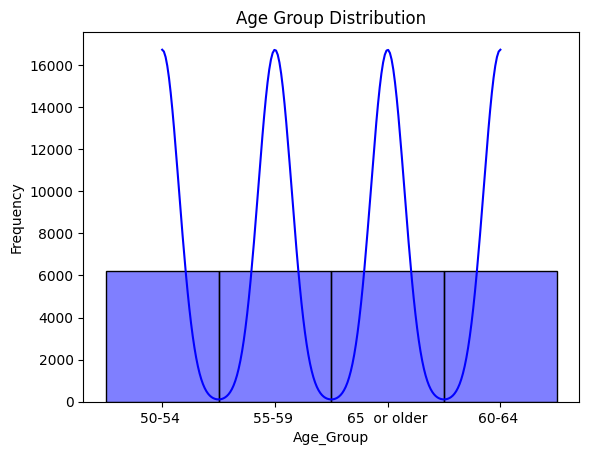

In [33]:
#Data Visualization Steps
#Univariate Analysis
# Plot a histogram for the 'Age_Group Column'
sns.histplot(df['Age_Group'], bins = 5, kde = True, color='blue') # kde adds a density curve
plt.title('Age Group Distribution')
plt.xlabel('Age_Group')
plt.ylabel('Frequency')
plt.show()             
             


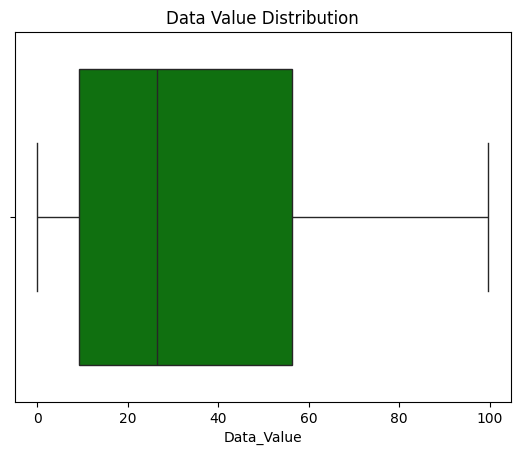

In [34]:
# Plot a box plot for the 'Data_Value' column
sns.boxplot(x = df['Data_Value'],color='green')
plt.title('Data Value Distribution')
plt.xlabel('Data_Value')
plt.show()


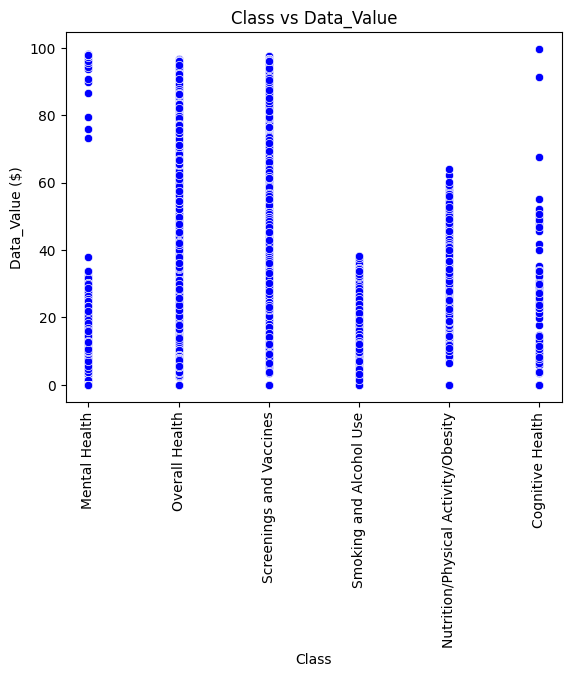

In [35]:
#scatter plots to visualize numerical variables against each other
sns.scatterplot(data=df,x = 'Class', y = 'Data_Value', color = 'blue')
plt.title('Class vs Data_Value')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Data_Value ($)')
plt.show()


C:\Users\HABEEB\AppData\Local\Temp\ipykernel_21000\70124826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df, x = 'Class', y = 'Data_Value', errorbar = None, palette = 'muted')


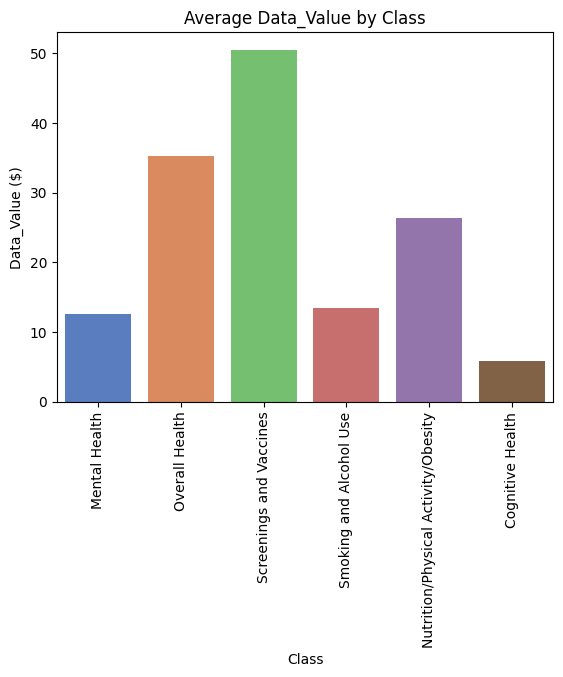

In [36]:
#Bar Plot
sns.barplot(data = df, x = 'Class', y = 'Data_Value', errorbar = None, palette = 'muted')
plt.title('Average Data_Value by Class')
plt.xlabel('Class')
plt.xticks(rotation=90)
plt.ylabel('Data_Value ($)')
plt.show()


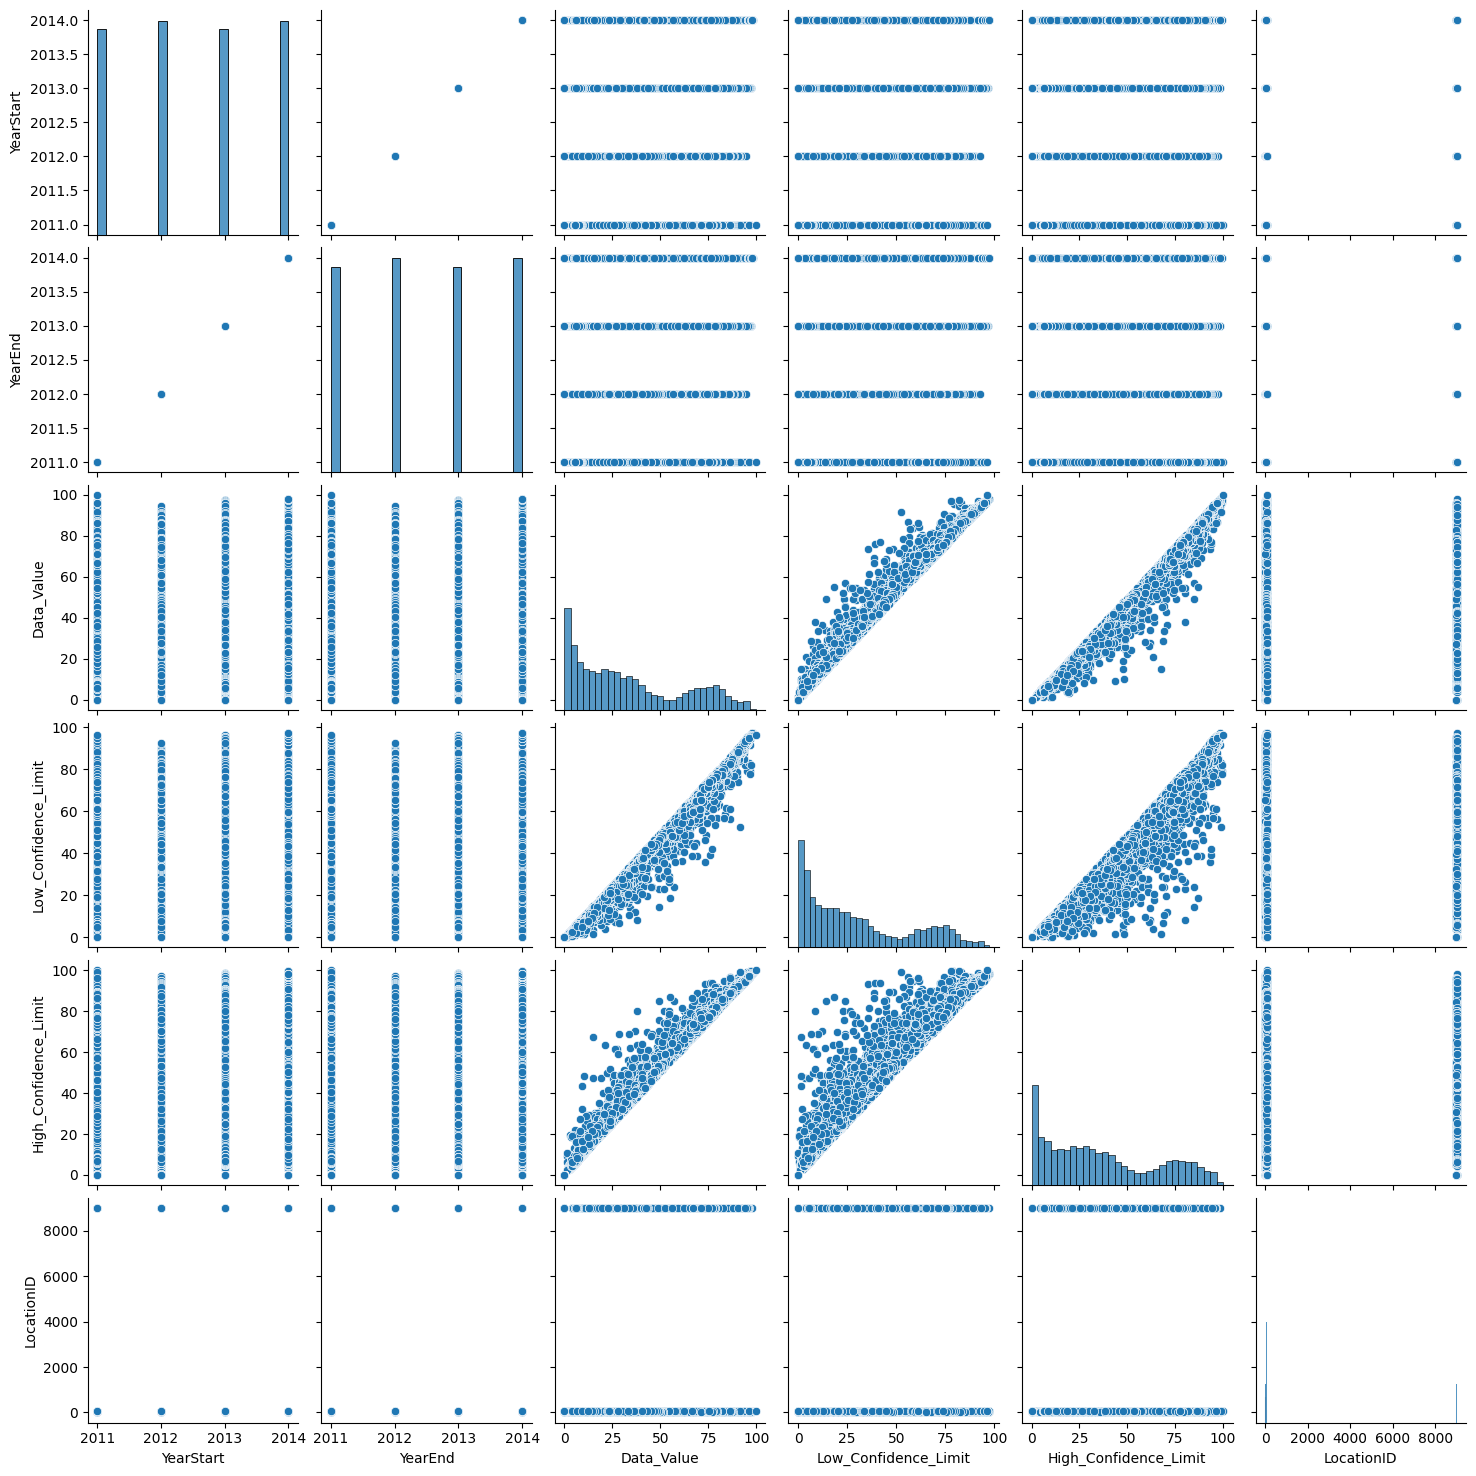

In [37]:
# Pair plot for selected columns (numerical ones)
sns.pairplot(df)
plt.show()

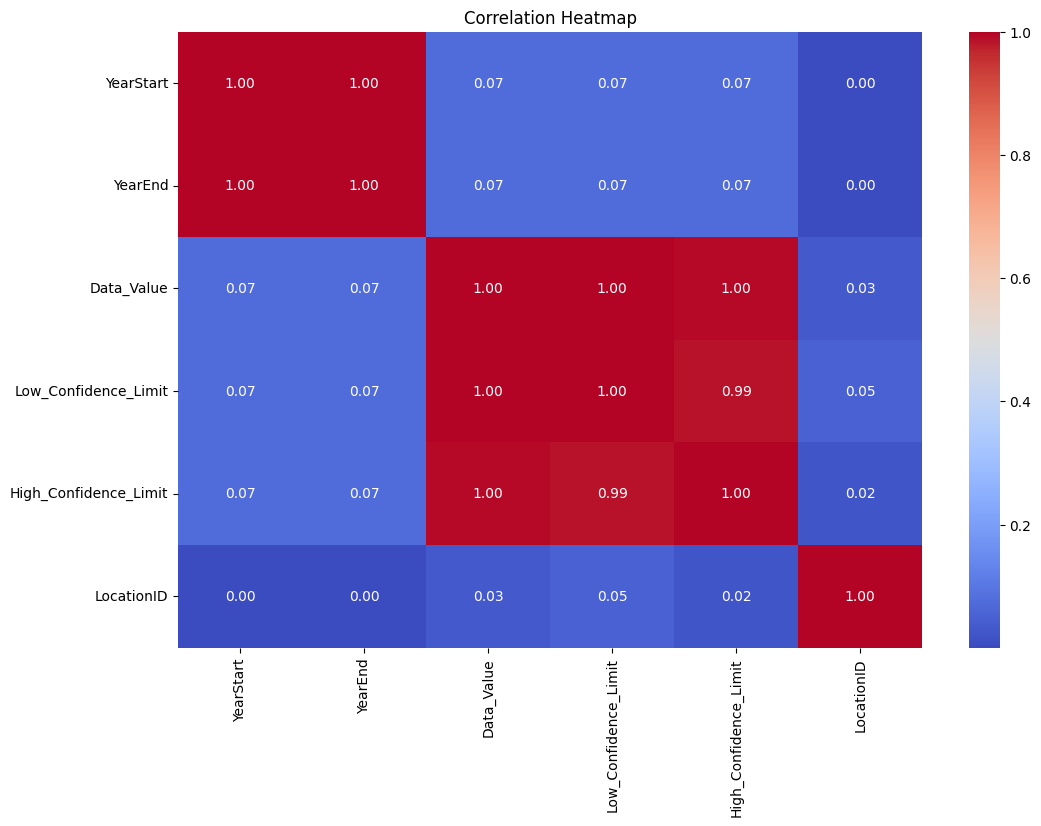

In [38]:
#Heatmap for Correlation
# Calculate correlation matrix
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

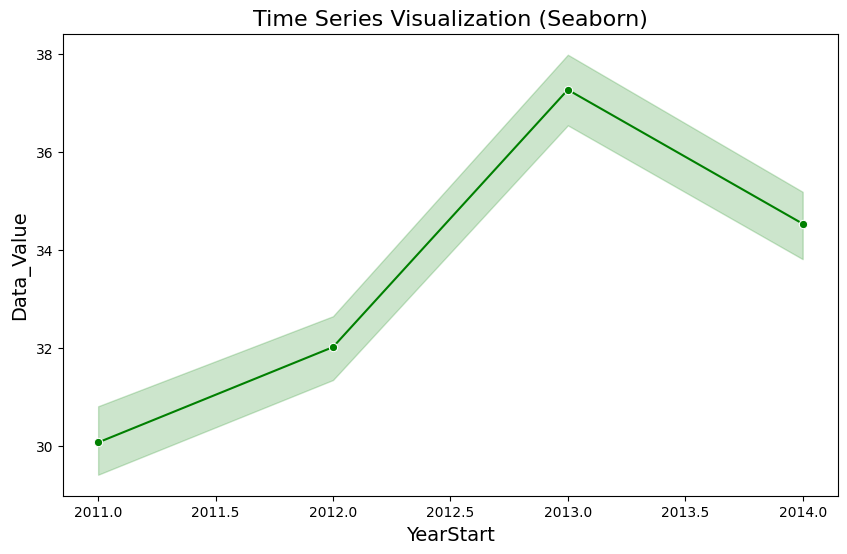

In [42]:
# Seaborn lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='YearStart', y='Data_Value', marker='o', color='green')
plt.title("Time Series Visualization (Seaborn)", fontsize=16)
plt.xlabel("YearStart", fontsize=14)
plt.ylabel("Data_Value", fontsize=14)
#plt.grid(True)  # Ensure plt.grid is being used as a function
plt.show()       
           

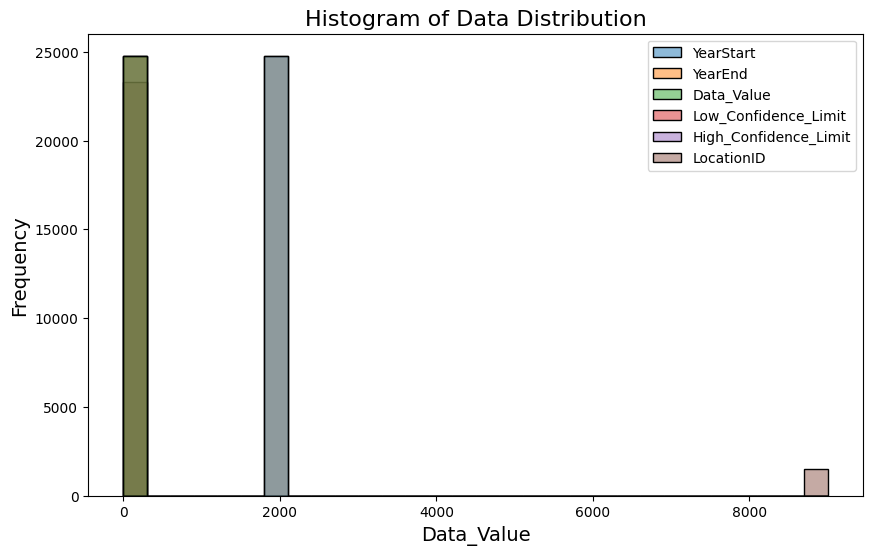

In [43]:
# Plot histogram
data = df
plt.figure(figsize = (10,6))
sns.histplot(data, bins=30, kde=False, color='blue')
plt.title("Histogram of Data Distribution", fontsize = 16)
plt.xlabel("Data_Value", fontsize = 14)
plt.ylabel("Frequency", fontsize =14)
plt.grid = (True)
plt.show()

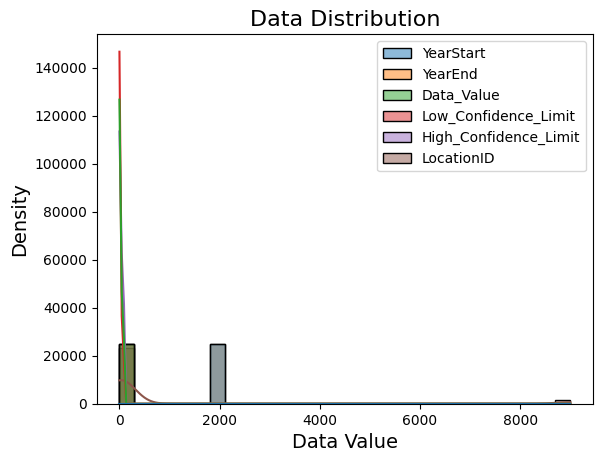

In [44]:
# KDE Plot
data = df
# Plot histogram with KDE
sns.histplot(data, kde=True, bins=30, color="blue")
plt.title("Data Distribution", fontsize=16)
plt.xlabel("Data Value", fontsize=14)
plt.ylabel("Density", fontsize=14)
plt.show()

In [45]:
#Project Phase2 , Implementing Machine learning Models

In [46]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Step 1: Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model
model.fit(X_train, Y_train)

# Step 3: Make predictions
Y_train_pred = model.predict(X_train)
Y_test_pred = model.predict(X_test)

# Step 4: Evaluate the model
train_rmse = mean_squared_error(Y_train, Y_train_pred, squared=False)
test_rmse = mean_squared_error(Y_test, Y_test_pred, squared=False)
train_r2 = r2_score(Y_train, Y_train_pred)
test_r2 = r2_score(Y_test, Y_test_pred)

print("\nModel Performance:")
print(f"Training RMSE: {train_rmse:.2f}, R²: {train_r2:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}, R²: {test_r2:.2f}")

                              


Model Performance:
Training RMSE: 0.08, R²: 1.00
Testing RMSE: 0.12, R²: 1.00


C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\HABEEB\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [49]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [52]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import pandas as pd
import joblib


In [60]:
# Splitting dataset
x = df.drop('Data_Value', axis = 1)
y = df['Data_Value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing
categorical_features = ['Class']
numeric_features = ['Low_Confidence_Limit', 'High_Confidence_Limit']

# Define transformations
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the full pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the pipeline
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Save the pipeline
joblib.dump(pipeline, 'pipeline_model.pkl')

print("Pipeline saved successfully!")

# To load and use the pipeline later
loaded_pipeline = joblib.load('pipeline_model.pkl')
predictions = loaded_pipeline.predict(X_test)
print("Predictions:", predictions)

Pipeline saved successfully!
Predictions: [ 7.169  87.347   0.     ... 24.4886 13.797   8.104 ]
